<a href="https://colab.research.google.com/github/hohenssi/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Build_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
path = "/content/drive/My Drive/Build Week 1/Parking_Violations_Issued_-_Fiscal_Year_2017.csv"
df = pd.read_csv(path)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18,38) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
#let's have an initial look at the dataframe 
df.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,5092469481,GZH7067,NY,PAS,07/10/2016,7,SUBN,TOYOT,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0143A,NaN,BX,NaN,NaN,ALLERTON AVE (W/B) @,BARNES AVE,0,1111,D,T,NaN,NaN,NaN,GY,NaN,2001,NaN,0,NaN,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN
1,5092451658,GZH7067,NY,PAS,07/08/2016,7,SUBN,TOYOT,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0400P,NaN,BX,NaN,NaN,ALLERTON AVE (W/B) @,BARNES AVE,0,1111,D,T,NaN,NaN,NaN,GY,NaN,2001,NaN,0,NaN,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN
2,4006265037,FZX9232,NY,PAS,08/23/2016,5,SUBN,FORD,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0233P,NaN,BX,NaN,NaN,SB WEBSTER AVE @ E 1,94TH ST,0,1111,C,T,NaN,NaN,NaN,BK,NaN,2004,NaN,0,NaN,BUS LANE VIOLATION,NaN,NaN,NaN
3,8478629828,66623ME,NY,COM,06/14/2017,47,REFG,MITSU,T,10610,34330,34350,20180630,14.0,14,14,359594,T102,J,1120A,NaN,NY,O,330,7th Ave,NaN,0,408,l2,NaN,Y,0700A,0700P,WH,NaN,2007,NaN,0,04,47-Double PKG-Midtown,NaN,NaN,NaN
4,7868300310,37033JV,NY,COM,11/21/2016,69,DELV,INTER,T,10510,34310,34330,20170228,13.0,13,13,364832,T102,M,0555P,NaN,NY,F,799,6th Ave,NaN,0,408,h1,NaN,Y,0700A,0700P,WHITE,NaN,2007,NaN,0,31 6,69-Failure to Disp Muni Recpt,NaN,NaN,NaN


In [ ]:
# our question is whether or not the make of your vehicle makes you more likely to receive a ticket
#so let's see the top 5 cars with tickets

df['Vehicle Make'].value_counts()

#Ford, Toyota, Honda, Nissan, Chevrolet

FORD     1280958
TOYOT    1211451
HONDA    1079238
NISSA     918590
CHEVR     714655
          ...   
PJT            1
SCTRO          1
VERDI          1
GRDA           1
ALLE           1
Name: Vehicle Make, Length: 5702, dtype: int64

In [ ]:
#let's pull the top five cars into a separate subset

condition = ((df['Vehicle Make'] == 'FORD') | (df['Vehicle Make'] == 'TOYOT') | (df['Vehicle Make'] == 'HONDA') | (df['Vehicle Make'] == 'NISSA') | (df['Vehicle Make'] == 'CHEVR'))
top_five = df[condition]
top_five.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,5092469481,GZH7067,NY,PAS,07/10/2016,7,SUBN,TOYOT,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0143A,NaN,BX,NaN,NaN,ALLERTON AVE (W/B) @,BARNES AVE,0,1111,D,T,NaN,NaN,NaN,GY,NaN,2001,NaN,0,NaN,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN
1,5092451658,GZH7067,NY,PAS,07/08/2016,7,SUBN,TOYOT,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0400P,NaN,BX,NaN,NaN,ALLERTON AVE (W/B) @,BARNES AVE,0,1111,D,T,NaN,NaN,NaN,GY,NaN,2001,NaN,0,NaN,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN
2,4006265037,FZX9232,NY,PAS,08/23/2016,5,SUBN,FORD,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0233P,NaN,BX,NaN,NaN,SB WEBSTER AVE @ E 1,94TH ST,0,1111,C,T,NaN,NaN,NaN,BK,NaN,2004,NaN,0,NaN,BUS LANE VIOLATION,NaN,NaN,NaN
6,1413609545,X20DCM,NJ,PAS,08/03/2016,40,SDN,TOYOT,P,54070,39430,54930,0,71.0,71,71,960290,0071,0000,0215A,NaN,K,F,439,KINGSTON,NaN,0,408,C3,NaN,BBBBBBB,ALL,ALL,WHITE,0.0,0,-,1,NaN,NaN,NaN,NaN,NaN
12,4625926610,N102911C,NY,OMT,10/27/2016,36,VAN,FORD,V,0,0,0,0,NaN,0,0,0,NaN,NaN,1022A,NaN,QN,NaN,NaN,EB HORACE HARDING EX,PRESSWAY @ PECK AVE,0,1180,B,T,NaN,NaN,NaN,WH,NaN,2008,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN


In [ ]:
#just out of curiosity, let's see the amount of types of violations

df['Violation Description'].value_counts()

PHTO SCHOOL ZN SPEED VIOLATION    1400614
21-No Parking (street clean)      1230545
38-Failure to Display Muni Rec    1056018
14-No Standing                     811080
37-Expired Muni Meter              593902
                                   ...   
44-Exc Limit (Com. Mtr. Zone)           4
93-Repair Flat Tire (Maj Road)          4
28-O/T STD,DPL/Con,30 Mn,D Dec          3
65-O/T STD,Dpl/Con,30 Mn,D/S            2
63-Nighttime STD/PKG in a Park          2
Name: Violation Description, Length: 107, dtype: int64

In [ ]:
#lets crosstab the top five cars with the types of violations

vehicle_n_violations = pd.crosstab(top_five['Vehicle Make'], top_five['Violation Description'])
vehicle_n_violations

#interesting violations: 14 no standing, 77 parked in bus lane, failure to stop at red light, 37 expired muni meter 
#similar numbers: no parking street cleaning 
#this particular crosstab won't be used specifically but just a general look into the violation types

Violation Description,01-No Intercity Pmt Displ,02-No operator N/A/PH,03-Unauth passenger pick-up,"04-Downtown Bus Area, 3 Hr Lim","04A-Downtown Bus Area, Non-Bus","04B-Downtown Bus Area, No Prmt",06-Nighttime PKG (Trailer),08-Engine Idling,09-Blocking the Box,10-No Stopping,11-No Stand (exc hotel load),12-No Stand (snow emergency),13-No Stand (taxi stand),14-No Standing,16-No Std (Com Veh) Com Plate,16A-No Std (Com Veh) Non-COM,17-No Stand (exc auth veh),18-No Stand (bus lane),19-No Stand (bus stop),20-No Parking (Com Plate),20A-No Parking (Non-COM),21-No Parking (street clean),22-No Parking (exc hotel load),23-No Parking (taxi stand),24-No Parking (exc auth veh),25-No Stand (commutr van stop),26-No Stnd (for-hire veh only),27-No Parking (exc handicap),"28-O/T STD,DPL/Con,30 Mn,D Dec",29-Altered Intercity bus pmt,30-No stopping/standing,31-No Stand (Com. Mtr. Zone),32-Overtime PKG-Missing Meter,32A Overtime PKG-Broken Meter,33-Feeding Meter,35-Selling /Offer Merchandise,35-Selling/Offer Merchandise,37-Expired Muni Meter,38-Failure to Display Muni Rec,39-Overtime PKG-Time Limt Post,...,67-Blocking Ped. Ramp,68-Not Pkg. Comp. w Psted Sign,69-Failure to Disp Muni Recpt,70-Reg. Sticker Missing (NYS),70A-Reg. Sticker Expired (NYS),70B-Impropr Dsply of Reg (NYS),71-Insp. Sticker Missing (NYS,71A-Insp Sticker Expired (NYS),71B-Improp Safety Stkr (NYS),72-Insp Stkr Mutilated,72A-Insp Stkr Counterfeit,73-Reg Stkr Mutilated,73A-Reg Stkr Counterfeit,74-Missing Display Plate,74A-Improperly Displayed Plate,74B-Covered Plate,75-No Match-Plate/Reg. Sticker,77-Parked Bus (exc desig area),78-Nighttime PKG on Res Street,79-Bus Layover,79-Bus Layover (No Pass),79A-Bus Layover (W/ Pass),80-Missing Equipment (specify),"81-No STD Ex C,A&D Dec, 30 Mn",82-Unaltered Commerc Vehicle,83-Improper Registration,84-Platform lifts in low posit,85-Storage-3 hour Commercial,86-Midtown PKG or STD-3 hr lim,89-No Stand Exc Com Plate,91-Veh for Sale (Dealer Only),92-Washing/Repairing Vehicle,93-Repair Flat Tire (Maj Road),96-Railroad Crossing,97-Vacant Lot,98-Obstructing Driveway,BUS LANE VIOLATION,FAILURE TO STOP AT RED LIGHT,Field Release Agreement,PHTO SCHOOL ZN SPEED VIOLATION
Vehicle Make,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CHEVR,34,5,15,1,111,4,1,82,3130,1570,632,0,1010,50004,10864,5386,3856,719,10508,8235,27385,75133,10,654,4017,11,92,67,0,1,25,10824,3,1,2,173,955,46380,95049,194,...,25,2719,30904,1058,11972,1067,2353,28473,65,488,194,193,26,2965,1104,880,551,839,3952,11,41,1,163,12,5211,1454,318,900,0,510,11,0,1,1,1,259,8560,29815,22,79672
FORD,245,13,112,1,140,7,0,205,5576,4668,831,0,2574,94362,36671,8473,7595,2408,21379,23545,40293,118501,11,2124,6030,23,189,91,1,8,114,17346,3,0,1,86,456,87775,132047,264,...,36,4714,56045,2352,18878,1706,4760,44739,112,802,281,309,54,6646,2171,1153,751,1991,12556,43,213,4,233,47,11149,2815,819,2929,4,1296,22,3,0,1,3,406,18891,49283,0,128869
HONDA,1,0,0,0,77,2,0,15,5685,965,322,0,924,54363,851,9589,5762,442,15690,504,67567,161152,4,1093,8405,16,38,185,0,3,10,12921,4,1,3,0,3,63118,108576,274,...,68,4932,543,2411,27944,2865,4304,55316,152,750,304,181,32,5924,2945,1465,962,2,147,4,12,0,206,10,442,27,9,24,0,145,44,2,0,4,0,808,16923,62718,26,170364
NISSA,1,0,0,1,66,6,0,28,4387,878,374,0,1291,47222,2713,7370,4733,482,12801,2234,54065,122757,12,1328,6725,16,52,155,0,2,6,10650,7,1,1,0,2,51256,86286,267,...,47,4004,2704,1992,22626,2087,4047,48274,160,775,342,144,32,5019,2603,1566,762,9,907,7,5,0,319,9,1001,90,30,205,0,129,33,0,0,2,1,667,15101,53786,24,165192
TOYOT,1,0,1,0,92,3,0,62,12521,1432,731,1,5302,61333,1620,11353,6231,600,17840,1186,73588,167709,13,4858,8705,19,51,190,1,3,9,17612,2,1,2,0,4,66106,117013,446,...,63,5809,1775,2748,26878,2608,3628,53041,121,724,325,209,29,3176,1439,1180,745,3,416,7,10,1,317,9,1194,59,8,56,0,483,29,0,0,3,0,1005,25240,83244,39,199270


In [ ]:
#let's also take a look at the top colors of the dataset
df['Vehicle Color'].value_counts().nlargest(15)

GY       1744316
WH       1687526
BK       1506970
WHITE    1253173
BLACK     634915
BL        598679
RD        385858
GREY      376283
SILVE     276164
BROWN     269748
BLUE      252482
RED       228593
GR        201118
TN        135133
OTHER     106853
Name: Vehicle Color, dtype: int64

I've decided to take a look at the correlation between vehicle color and citations

In [ ]:
df.shape
# there are 10803028 total cars 
# I will take note of the percentage of vehicle colors in the dataset 
# i.e.
# red cars account for .23 % of all the cars
# gray counts for 1.14% of all the cars 

(10803028, 43)

In [18]:
failure_to_stop = df[df['Violation Description'] == 'FAILURE TO STOP AT RED LIGHT']
failure_to_stop['Vehicle Color'].value_counts().sum()

#there are 516388 violations of this decription
#meaning it accoutns for 4.78 percent of al violations

#there are 483813 listings of cars of different colors lsited for this violation
#so we will compare the amount of cited vehicles to this number instead 

483813

In [ ]:
white_cond = ((df['Vehicle Color'] == 'WH') & (df['Violation Description'] == 'FAILURE TO STOP AT RED LIGHT'))
white_failure_to_stop = df[white_cond]
white_failure_to_stop['Vehicle Color'].value_counts().sum()
#the sum of this color is 78903

#white is listed as 2 different codes, so I will find the other sum and add it
wh_cond = ((df['Vehicle Color'] == 'WHITE') & (df['Violation Description'] == 'FAILURE TO STOP AT RED LIGHT'))
wh_failure_to_stop = df[wh_cond]
wh_failure_to_stop['Vehicle Color'].value_counts().sum()
#this total is 1622
#so the total amount is 80525
#which is 16.64% of the total number of car colors ticketed for this violation 
 

1622

In [ ]:
rd_cond = ((df['Vehicle Color'] == 'RD') & (df['Violation Description'] == 'FAILURE TO STOP AT RED LIGHT'))
red_failure_to_stop = df[rd_cond]
red_failure_to_stop['Vehicle Color'].head()
# there are 25210 red vehicles with this viol desc
#5.21% of red cars out of all colors with this violation 

red_cond = ((df['Vehicle Color'] == 'RED') & (df['Violation Description'] == 'FAILURE TO STOP AT RED LIGHT'))
red_failure = df[red_cond]
red_failure['Vehicle Color'].value_counts().sum()
#2344 total
#27554 altogether
#5.7% overall 

2344

In [ ]:
gy_cond = ((df['Vehicle Color'] == 'GY') & (df['Violation Description'] == 'FAILURE TO STOP AT RED LIGHT'))
gy_failure_to_stop = df[gy_cond]
# there are 122823 gray vehicles with this violation 
#meaning gray cars have 25.39% of all car colors with this violation 

grey_cond = ((df['Vehicle Color'] == 'GREY') & (df['Violation Description'] == 'FAILURE TO STOP AT RED LIGHT'))
grey_failure = df[grey_cond]
grey_failure['Vehicle Color'].value_counts().sum()
#plus the 469 
#123292 total 
# 25.48 % 

469

In [ ]:
other_cond = ((df['Vehicle Color'] == 'OTHER') & (df['Violation Description'] == 'FAILURE TO STOP AT RED LIGHT'))
other_failure = df[other_cond]
other_failure['Vehicle Color'].value_counts().sum()
#4 

tan_cond = ((df['Vehicle Color'] == 'TN') & (df['Violation Description'] == 'FAILURE TO STOP AT RED LIGHT'))
tan_failure = df[tan_cond]
tan_failure['Vehicle Color'].value_counts().sum()
#9922

brown_cond = ((df['Vehicle Color'] == 'BROWN') & (df['Violation Description'] == 'FAILURE TO STOP AT RED LIGHT'))
brown_failure = df[brown_cond]
brown_failure['Vehicle Color'].value_counts().sum()
#56 

# total is : 9982
# 2.06%

56

In [ ]:
#just a second look at the values so I don't have to scroll all of the way up

df['Vehicle Color'].value_counts().nlargest(15)

GY       1744316
WH       1687526
BK       1506970
WHITE    1253173
BLACK     634915
BL        598679
RD        385858
GREY      376283
SILVE     276164
BROWN     269748
BLUE      252482
RED       228593
GR        201118
TN        135133
OTHER     106853
Name: Vehicle Color, dtype: int64

In [ ]:
#blue counts 
bl_cond = ((df['Vehicle Color'] == 'BLUE') & (df['Violation Description'] == 'FAILURE TO STOP AT RED LIGHT'))
blue_failure = df[bl_cond]
blue_failure['Vehicle Color'].value_counts().sum()
#total of blue is 750

blue_cond = ((df['Vehicle Color'] == 'BL') & (df['Violation Description'] == 'FAILURE TO STOP AT RED LIGHT'))
bl_failure = df[blue_cond]
bl_failure['Vehicle Color'].value_counts().sum()
#39814 total 
#40564 overall 
# 8.38 % of all colors 

39814

In [ ]:
#black counts
bk_cond = ((df['Vehicle Color'] == 'BK') & (df['Violation Description'] == 'FAILURE TO STOP AT RED LIGHT'))
bk_failure = df[bk_cond]
#bk_failure['Vehicle Color'].value_counts().sum()
#bk count is 116048

black_cond = ((df['Vehicle Color'] == 'BLACK') & (df['Violation Description'] == 'FAILURE TO STOP AT RED LIGHT'))
black_failure = df[black_cond]
black_failure['Vehicle Color'].value_counts().sum()
#black count is 1096
#total of 117144
# 24.21% of the total 

1096

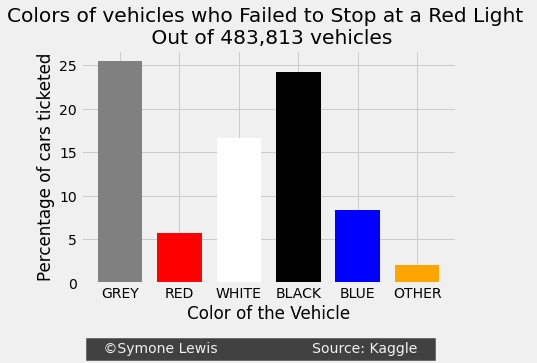

In [ ]:
plt.style.use('fivethirtyeight')

#set the percentage of each color of vehicle as the heights 
height = [25.48, 5.7, 16.64, 24.21, 8.38, 2.06]
#set labels for the bars 
bars = ('GREY', 'RED', 'WHITE', 'BLACK', 'BLUE', 'OTHER')

y = np.arange(len(bars))
fig,ax = plt.subplots()

plt.bar(y, height, width=0.75, color=('grey', 'red', 'white', 'black', 'blue', 'orange'))
plt.xticks(y, bars)
plt.title('Colors of vehicles who Failed to Stop at a Red Light \n Out of 483,813 vehicles')
ax.set_ylabel("Percentage of cars ticketed")
ax.set_xlabel('Color of the Vehicle')

# Line at bottom for signature line
ax.text(x = -.5, y = -8,
    s = '   ©Symone Lewis                     Source: Kaggle   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = '#414141');

plt.show()


# THATS IT FOR COLOR VS FAILURE TO STOP AT RED LIGHT 

THAT TOOK LONGER THAN EXPECTED 

In [19]:
#let's take another look and decide what to compare next
df.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,5092469481,GZH7067,NY,PAS,07/10/2016,7,SUBN,TOYOT,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0143A,NaN,BX,NaN,NaN,ALLERTON AVE (W/B) @,BARNES AVE,0,1111,D,T,NaN,NaN,NaN,GY,NaN,2001,NaN,0,NaN,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN
1,5092451658,GZH7067,NY,PAS,07/08/2016,7,SUBN,TOYOT,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0400P,NaN,BX,NaN,NaN,ALLERTON AVE (W/B) @,BARNES AVE,0,1111,D,T,NaN,NaN,NaN,GY,NaN,2001,NaN,0,NaN,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN
2,4006265037,FZX9232,NY,PAS,08/23/2016,5,SUBN,FORD,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0233P,NaN,BX,NaN,NaN,SB WEBSTER AVE @ E 1,94TH ST,0,1111,C,T,NaN,NaN,NaN,BK,NaN,2004,NaN,0,NaN,BUS LANE VIOLATION,NaN,NaN,NaN
3,8478629828,66623ME,NY,COM,06/14/2017,47,REFG,MITSU,T,10610,34330,34350,20180630,14.0,14,14,359594,T102,J,1120A,NaN,NY,O,330,7th Ave,NaN,0,408,l2,NaN,Y,0700A,0700P,WH,NaN,2007,NaN,0,04,47-Double PKG-Midtown,NaN,NaN,NaN
4,7868300310,37033JV,NY,COM,11/21/2016,69,DELV,INTER,T,10510,34310,34330,20170228,13.0,13,13,364832,T102,M,0555P,NaN,NY,F,799,6th Ave,NaN,0,408,h1,NaN,Y,0700A,0700P,WHITE,NaN,2007,NaN,0,31 6,69-Failure to Disp Muni Recpt,NaN,NaN,NaN


In [5]:
df['Violation Description'].value_counts()
#let's now focus on PHTO SCHOOL ZN SPEED VIOLATION

PHTO SCHOOL ZN SPEED VIOLATION    1400614
21-No Parking (street clean)      1230545
38-Failure to Display Muni Rec    1056018
14-No Standing                     811080
37-Expired Muni Meter              593902
                                   ...   
93-Repair Flat Tire (Maj Road)          4
44-Exc Limit (Com. Mtr. Zone)           4
28-O/T STD,DPL/Con,30 Mn,D Dec          3
65-O/T STD,Dpl/Con,30 Mn,D/S            2
63-Nighttime STD/PKG in a Park          2
Name: Violation Description, Length: 107, dtype: int64

In [7]:
#let's grab all of the top vehicle makes
df['Vehicle Make'].value_counts().nlargest(20)

FORD     1280958
TOYOT    1211451
HONDA    1079238
NISSA     918590
CHEVR     714655
FRUEH     429158
ME/BE     389051
BMW       374929
DODGE     372127
JEEP      348145
HYUND     297065
GMC       255112
LEXUS     245906
INTER     243763
ACURA     200146
CHRYS     177227
VOLKS     176559
INFIN     175104
SUBAR     140760
AUDI      135732
Name: Vehicle Make, dtype: int64

In [6]:
df['Vehicle Make'].value_counts().nsmallest(5)
#I had the idea to grab the bottom 5 values BUT these sample sizes won't be big enough
# so I expanded the largest amount to grab some values from near the middle 

INLHA    1
FAR      1
CHD      1
BENLE    1
MACK`    1
Name: Vehicle Make, dtype: int64

In [8]:
#lets make a subset for everything with the violation description for school zn speed violation 

speed_cond = (df['Violation Description'] == 'PHTO SCHOOL ZN SPEED VIOLATION')
school_viol = df[speed_cond]

#now let's see the value counts for all makes in this description

school_viol['Vehicle Make'].value_counts().nlargest(20)
#ford looks surprisingly low here 

TOYOT    199270
HONDA    170364
NISSA    165192
FORD     128869
CHEVR     79672
BMW       60645
JEEP      59295
ME/BE     58781
HYUND     53119
DODGE     48974
LEXUS     48733
INFIN     33895
ACURA     31672
CHRYS     26477
GMC       24470
VOLKS     22184
AUDI      20328
SUBAR     19822
KIA       19173
LINCO     16904
Name: Vehicle Make, dtype: int64

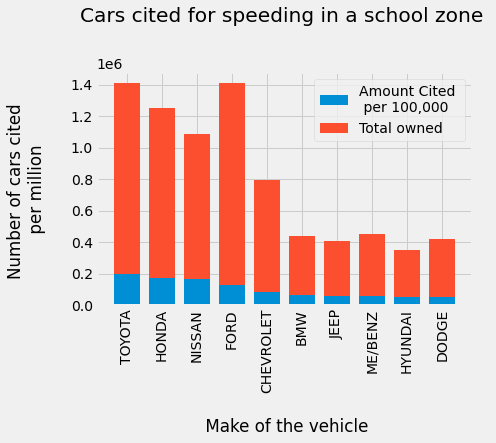

In [67]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

#set the number of each amount of vehicle
height = [199270, 170364, 165192, 128869, 79672, 60645, 59295, 58781, 53119, 48974]

#lets also include how many of these cars are in the df in total
original = [1211451, 1079238, 918590, 1280958, 714655, 374929, 348145, 389051, 297065, 372127]

#set labels for the bars 
bars = ('TOYOTA', 'HONDA', 'NISSAN', 'FORD', 'CHEVROLET', 'BMW', 'JEEP', 'ME/BENZ', 'HYUNDAI', 'DODGE')

y = np.arange(len(bars))
fig,ax = plt.subplots()

plt.bar(y, height, width=0.75, color=('blue'))
ax.bar(bars, height, width=.75, label='Amount Cited \n per 100,000')
ax.bar(bars, original, width=.75, bottom=height, label='Total owned')
ax.set_xticklabels(bars, rotation=(90))

plt.title('Cars cited for speeding in a school zone \n \n')
ax.set_ylabel("Number of cars cited \n per million \n")
ax.set_xlabel('\n Make of the vehicle')

ax.legend()

# Line at bottom for signature line
# ax.text(x = -.5, y = 0,
#   s = '   ©Symone Lewis                      Source: Kaggle   ',
#   fontsize = 14, color = '#f0f0f0', backgroundcolor = '#414141');

plt.show()

#I don't like this graph :) it's very hard to read 

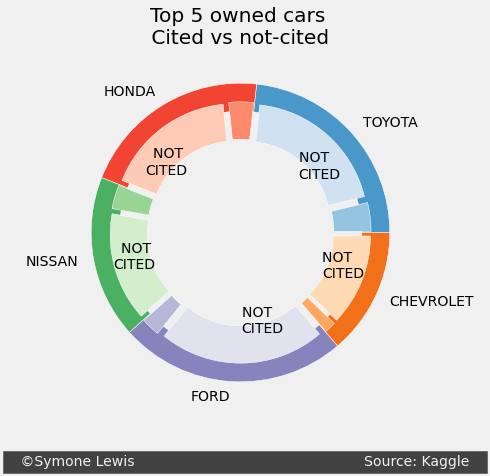

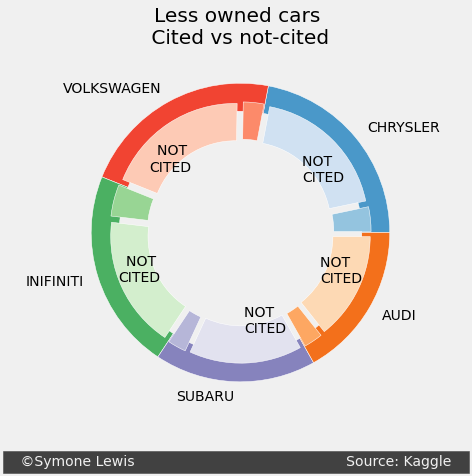

In [107]:
#lets try a donut graph

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)

#lets do 5 groups and 10 subgroups
group_names = ['TOYOTA', 'HONDA', 'NISSAN', 'FORD', 'CHEVROLET']
group_size = [1211451, 1079238, 918590, 1280958, 714655]
subgroup_names = ['', 'NOT \nCITED', '', 'NOT \nCITED', '', 'NOT \nCITED', '', 'NOT \nCITED', '', 'NOT \nCITED']
subgroup_size = [199270, 1012181, 170364, 908919, 165192, 753398, 128869, 1152089, 79672, 634983]

#colors 
a, b, c, d, e = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples, plt.cm.Oranges]

#Outside ring
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.6, labels=group_names, colors=[a(0.6), b(0.6), c(0.6), d(0.6), e(0.6)])
plt.setp(mypie, width=0.3, edgecolor='white')

#inner ring
mypie2, _ = ax.pie(subgroup_size, radius=1.6-0.3, labels=subgroup_names, labeldistance=0.65, explode=explode, colors=[a(0.4), a(0.2), b(0.4), b(0.2), c(0.4), c(0.2), d(0.4), d(0.2), e(0.4), e(0.2)])
# These subgroup labels gave me a hard time, so I exploded the graph to give some more space for the labels 
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)

ax.set_title('Top 5 owned cars \n Cited vs not-cited \n \n \n ')

ax.text(x = -2.5, y = -2.5,
  s = '   ©Symone Lewis                                                   Source: Kaggle   ',
  fontsize = 14, color = '#f0f0f0', backgroundcolor = '#414141');
plt.show()



#lets do 5 groups and 10 subgroups
group_names2 = ['CHRYSLER', 'VOLKSWAGEN', 'INIFINITI', 'SUBARU', 'AUDI']
group_size2 = [177227, 176559, 175104, 140760, 135732] 
subgroup_names2 = ['', 'NOT \nCITED', '', 'NOT \nCITED', '', 'NOT \nCITED', '', 'NOT \nCITED', '', 'NOT \nCITED']
subgroup_size2 = [26477, 150750, 22184, 154375, 33895, 141209, 19822, 120938, 20328, 115404]


#colors 
a, b, c, d, e = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples, plt.cm.Oranges]

#Outside ring
fig, ax = plt.subplots()
ax.axis('equal')
mypie3, _ = ax.pie(group_size2, radius=1.6, labels=group_names2, colors=[a(0.6), b(0.6), c(0.6), d(0.6), e(0.6)])
plt.setp(mypie3, width=0.3, edgecolor='white')

 

#inner ring
mypie4, _ = ax.pie(subgroup_size2, radius=1.6-0.3, labels=subgroup_names2, labeldistance=0.65, explode=explode, colors=[a(0.4), a(0.2), b(0.4), b(0.2), c(0.4), c(0.2), d(0.4), d(0.2), e(0.4), e(0.2)])
plt.setp( mypie4, width=0.4, edgecolor='white')
plt.margins(0,0)

ax.set_title('Less owned cars \n Cited vs not-cited \n \n \n')

ax.text(x = -2.5, y = -2.5,
  s = '   ©Symone Lewis                                               Source: Kaggle   ',
  fontsize = 14, color = '#f0f0f0', backgroundcolor = '#414141');
plt.show()

After you finish the last section, lets make a point about the most owned vehicles so ew can make a fair comparison 

In [22]:
#🤡 
#Lets compare all in state registered cars vs out of state 
#because why not 

df.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,5092469481,GZH7067,NY,PAS,07/10/2016,7,SUBN,TOYOT,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0143A,NaN,BX,NaN,NaN,ALLERTON AVE (W/B) @,BARNES AVE,0,1111,D,T,NaN,NaN,NaN,GY,NaN,2001,NaN,0,NaN,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN
1,5092451658,GZH7067,NY,PAS,07/08/2016,7,SUBN,TOYOT,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0400P,NaN,BX,NaN,NaN,ALLERTON AVE (W/B) @,BARNES AVE,0,1111,D,T,NaN,NaN,NaN,GY,NaN,2001,NaN,0,NaN,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN
2,4006265037,FZX9232,NY,PAS,08/23/2016,5,SUBN,FORD,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0233P,NaN,BX,NaN,NaN,SB WEBSTER AVE @ E 1,94TH ST,0,1111,C,T,NaN,NaN,NaN,BK,NaN,2004,NaN,0,NaN,BUS LANE VIOLATION,NaN,NaN,NaN
3,8478629828,66623ME,NY,COM,06/14/2017,47,REFG,MITSU,T,10610,34330,34350,20180630,14.0,14,14,359594,T102,J,1120A,NaN,NY,O,330,7th Ave,NaN,0,408,l2,NaN,Y,0700A,0700P,WH,NaN,2007,NaN,0,04,47-Double PKG-Midtown,NaN,NaN,NaN
4,7868300310,37033JV,NY,COM,11/21/2016,69,DELV,INTER,T,10510,34310,34330,20170228,13.0,13,13,364832,T102,M,0555P,NaN,NY,F,799,6th Ave,NaN,0,408,h1,NaN,Y,0700A,0700P,WHITE,NaN,2007,NaN,0,31 6,69-Failure to Disp Muni Recpt,NaN,NaN,NaN


In [4]:
#group the citations by Reg state 
Viol_by_state = df.groupby(by='Registration State', as_index=False).count()
Viol_by_state.head(10)

,Registration State,Summons Number,Plate ID,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,99,36625,36625,36625,36625,36625,31519,30051,36625,36625,36625,36625,36625,35862,36625,36625,36625,36559,36559,36625,1483,33926,33035,30335,36185,4156,36625,36625,36469,66,35216,33124,33124,32691,31333,36625,31376,36625,5226,5164,0,0,0
1,AB,218,218,218,218,218,214,214,218,218,218,218,218,218,218,218,218,218,218,218,10,218,218,209,218,36,218,218,218,0,202,135,135,215,12,218,21,218,206,206,0,0,0
2,AK,754,754,754,754,754,746,744,754,754,754,754,754,699,754,754,754,699,697,754,25,749,696,680,754,165,754,754,754,55,669,499,499,746,91,754,113,754,608,663,0,0,0
3,AL,6891,6891,6891,6891,6891,6818,6853,6891,6891,6891,6891,6891,5924,6891,6891,6891,5934,5934,6891,288,6860,5833,5762,6887,1841,6891,6891,6891,957,5699,4331,4331,6874,1073,6891,1318,6891,4861,5818,0,0,0
4,AR,2621,2621,2621,2621,2621,2601,2597,2621,2621,2621,2621,2621,2402,2621,2621,2621,2404,2403,2621,202,2607,2368,2340,2620,555,2621,2621,2620,217,2257,1686,1686,2605,402,2621,529,2621,2002,2219,0,0,0
5,AZ,26426,26426,26426,26426,26426,26201,26186,26426,26426,26426,26426,26426,23362,26426,26426,26426,23396,23393,26426,2080,26274,23047,22843,26416,6447,26426,26426,26425,3030,21853,15400,15400,23258,4267,26426,5335,26426,19129,22161,0,0,0
6,BC,127,127,127,127,127,127,126,127,127,127,127,127,126,127,127,127,126,126,127,12,126,123,122,127,25,127,127,127,1,123,87,87,127,13,127,25,127,113,114,0,0,0
7,CA,24260,24260,24260,24260,24260,24073,24002,24260,24260,24260,24260,24260,21631,24260,24260,24260,21651,21650,24260,1308,24164,21339,21110,24248,5649,24260,24260,24258,2609,20689,15991,15991,21604,3422,24260,4482,24260,18229,20838,0,0,0
8,CO,4093,4093,4093,4093,4093,4061,4071,4093,4093,4093,4093,4093,3663,4093,4093,4093,3667,3666,4093,211,4078,3623,3580,4092,952,4093,4093,4093,426,3540,2715,2715,3658,525,4093,700,4093,3142,3568,0,0,0
9,CT,141088,141088,141088,141088,141088,140033,140294,141088,141088,141088,141088,141088,120786,141088,141088,141088,120930,120915,141088,10626,140482,119485,117472,141041,37862,141088,141088,141080,20158,115472,84661,84661,140378,15921,141088,25173,141088,105009,125167,0,0,0


In [5]:
df['Registration State'].value_counts().sum()

10803028

In [6]:
df['Registration State'].value_counts().nlargest(10)
#top 10 states with ticket violations in NY 
#lmao FL
#all of these subtracted from the total mean 468411 violations are from random other states

NY    8481061
NJ     925965
PA     285419
FL     144556
CT     141088
MA      85547
IN      80749
VA      72626
MD      61800
NC      55806
Name: Registration State, dtype: int64

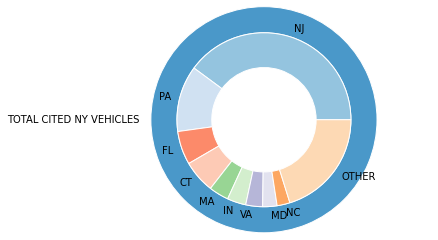

In [43]:
#lets do 5 groups and 10 subgroups
group_names = ['TOTAL CITED NY VEHICLES']
group_size = [1080328]
subgroup_names = ['NJ', 'PA', 'FL', 'CT', 'MA', 'IN', 'VA', 'MD', 'NC', 'OTHER']
subgroup_size = [925965, 285419, 144556, 141088, 85547, 80749, 72626, 61800, 55806, 468411]

#colors 
a, b, c, d, e = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples, plt.cm.Oranges]

#Outside ring
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6)])
plt.setp(mypie, width=0.3, edgecolor='white')

#inner ring
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, colors=[a(0.4), a(0.2), b(0.4), b(0.2), c(0.4), c(0.2), d(0.4), d(0.2), e(0.4), e(0.2)])
# I TOOK OUT THE SUBGROUP LABELS FOR NOW BECAUSE THEY FORMATTED WEIRD 
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)


#I don't like this graph
#plt.legend()
plt.show()

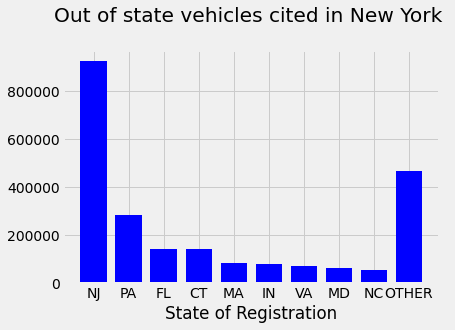

In [12]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
fig, ax= plt.subplots()

state = [925965, 285419, 144556, 141088, 85547, 80749, 72626, 61800, 55806, 468411]
x = ['NJ', 'PA', 'FL', 'CT', 'MA', 'IN', 'VA', 'MD', 'NC', 'OTHER']
y_pos_state = np.arange(len(state))

plt.title('Out of state vehicles cited in New York \n')
ax.set_xlabel("State of Registration")

plt.bar(y_pos_state, height_state, width=0.75, color=('blue'))
plt.xticks(y_pos_state, x)

#Line at bottom for signature line
# ax.text(x = -.5, y = -8,
#     s = '   ©Symone Lewis                     Source: Kaggle   ',
#     fontsize = 14, color = '#f0f0f0', backgroundcolor = '#414141');
#for some reason I CANNOT get this signature bar to move on the y axis 

plt.show()

In [47]:
#lets analyze the reg states and the types of violations AS WELL AS car make
df[df['Registration State'] == 'FL']['Vehicle Make'].value_counts().nlargest(10)

NISSA    14957
TOYOT    14813
HONDA    13484
FORD     11486
CHEVR     9347
ME/BE     8027
BMW       7962
DODGE     6657
HYUND     6225
JEEP      4937
Name: Vehicle Make, dtype: int64

In [53]:
#you can ignore this, I'm just looking at something 
df[(df['Vehicle Make'] == 'ME/BE')]['Violation Description'].value_counts().nlargest(10)

PHTO SCHOOL ZN SPEED VIOLATION    58781
38-Failure to Display Muni Rec    45010
21-No Parking (street clean)      40720
37-Expired Muni Meter             29997
14-No Standing                    24932
FAILURE TO STOP AT RED LIGHT      20070
20A-No Parking (Non-COM)          19699
71A-Insp Sticker Expired (NYS)    18481
40-Fire Hydrant                   15133
70A-Reg. Sticker Expired (NYS)     9814
Name: Violation Description, dtype: int64

In [54]:
df['Violation Description'].value_counts().nlargest(10)

PHTO SCHOOL ZN SPEED VIOLATION    1400614
21-No Parking (street clean)      1230545
38-Failure to Display Muni Rec    1056018
14-No Standing                     811080
37-Expired Muni Meter              593902
FAILURE TO STOP AT RED LIGHT       516388
20A-No Parking (Non-COM)           495591
71A-Insp Sticker Expired (NYS)     454867
40-Fire Hydrant                    422674
19-No Stand (bus stop)             228931
Name: Violation Description, dtype: int64